# IBM Data Science Final Capstone Project

 ## Which London boroughs provide the best amenities such as coffee shops, resturants and parks. But also have low or lower crime rates than other London boroughs



## Introduction

London is a large and vibrant city, with a population of around 9 million people. It is popular not only as the Capital of the United Kingdom and the work oppurtunities it provides,  but also becuase it provides great services and amentities. London is a city with many coffee shops, great resturants and place to visit, it is also a green city with parks and open spaces which make it attractive to people looking to live and work there. 

Of course the downside of any large city is Crime, in 2018/19 there were a total of 912,000 crimes across London.


## Problem Description

London is comprised of 32 Boroughs and the City of London (not classed as a Borough), if someone was moving to London which Borough should they choose to search for a place to live, obviously they would like to have the advantages which London brings such as great places to eat and drink and be able to get out and enjoy parks for recreation and excercise, but also to have a low crime rate.

To answer this question we will utilize the FourSquare API to provide data on the key catergories of venues, details of the London boroughs from wikipedia, and London Crime Data from Uk Government

 ## Data Collection

We will use the following three datasets to analyse the London boroughs

London Crime data is available to dowload at https://data.london.gov.uk/dataset/recorded_crime_summary, this provides a breakdown of crimes at different geographical levels within london. This doesnt include the City of London but we can but we can download this from the city of london police website https://www.ukcrimestats.com/Police_Force/City_of_London_Police

Wikipedia resource provides a list of all the London boroughs, which is available at https://en.wikipedia.org/wiki/List_of_London_boroughs, handily this dataset includes the latitude and longitude of each borough, along with population estimates and the area of the borough.

House price information is available on the UK Government website https://www.gov.uk/government/publications/uk-house-price-index-england-march-2020/uk-house-price-index-england-march-2020

Information on types and numbers of venues such as coffee shops, cafes, parks etc is available through the Foursquare API and we will use the latitude / longitude from the London Borough data to pull this information from the FourSquare database

    
Lets load the libaries and download the crime dataset

 ## Crime Data

In [1]:
import pandas as pd
import io
import requests

url="https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv"
s=requests.get(url).content
df_crime=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [2]:
# lets take a quick look at the data provided
print('How many rows and columns do we have',df_crime.shape)
df_crime.head()

How many rows and columns do we have (1569, 27)


MajorText                          MinorText  \
0  Arson and Criminal Damage                              Arson   
1  Arson and Criminal Damage                    Criminal Damage   
2                   Burglary  Burglary - Business and Community   
3                   Burglary             Burglary - Residential   
4              Drug Offences                   Drug Trafficking   

     LookUp_BoroughName  201807  201808  201809  201810  201811  201812  \
0  Barking and Dagenham       6       5       3       8       5       1   
1  Barking and Dagenham     127     101     107     132     105      88   
2  Barking and Dagenham      30      18      33      32      39      33   
3  Barking and Dagenham      94      84      99      94     106     164   
4  Barking and Dagenham       8       7      10       7       7       4   

   201901  ...  201909  201910  201911  201912  202001  202002  202003  \
0       5  ...       6       9       8       6       4       5       6   
1      97  ...     109     109      97     121      97     103     107   
2      45  ...      37      30      30      25      31      17      28   
3     114  ...      80      97     114     130     116     123      97   
4       5  ...       7       8      13       3      14       5       6   

   202004  202005  202006  
0       2       2       4  
1      80      86     121  
2      29      16      16  
3      57      41      63  
4      12      12       7  

[5 rows x 27 columns]

The crime dataset provides a breakdown of types of crime per borough, for each month covering the last 24 months. We will use this data to provide the total number of crimes for each borough to identify which boroughs have lower rates of crime

But first lets clean it up a bit and make it a bit easier to use


In [3]:
# Check the list of Boroughs,

df_crime['LookUp_BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [4]:
# Remove London Heathrow and London City Airports as we dont want those
df_crime = df_crime[df_crime['LookUp_BoroughName'] != 'London Heathrow and London City Airports']

We will use the 2019 data for our crime total so we will remove the columns that are for different months

Please note the dataset provided is the last 24 months, and it is updated each month so if you are repeating this notebook you may want to use the dowloaded .csv files in the Github repository instead

In [5]:
df_crime = df_crime.drop(df_crime.columns[3:9], axis= 1)
df_crime = df_crime.drop(df_crime.columns[15:], axis= 1)

In [6]:
df_crime.head()

MajorText                          MinorText  \
0  Arson and Criminal Damage                              Arson   
1  Arson and Criminal Damage                    Criminal Damage   
2                   Burglary  Burglary - Business and Community   
3                   Burglary             Burglary - Residential   
4              Drug Offences                   Drug Trafficking   

     LookUp_BoroughName  201901  201902  201903  201904  201905  201906  \
0  Barking and Dagenham       5       2       5       5      11       3   
1  Barking and Dagenham      97     127     138     130     140     113   
2  Barking and Dagenham      45      24      29      27      21      27   
3  Barking and Dagenham     114     107      99      96     114      96   
4  Barking and Dagenham       5       2       6       5       9       6   

   201907  201908  201909  201910  201911  201912  
0       5       3       6       9       8       6  
1     134     118     109     109      97     121  
2      31      35      37      30      30      25  
3      71      67      80      97     114     130  
4      11       7       7       8      13       3

In [7]:
# Add in a total column for 2019 crime numbers

df_crime['Total Crime']= df_crime.sum(axis=1, numeric_only = True)

In [8]:
df_crime.head()

MajorText                          MinorText  \
0  Arson and Criminal Damage                              Arson   
1  Arson and Criminal Damage                    Criminal Damage   
2                   Burglary  Burglary - Business and Community   
3                   Burglary             Burglary - Residential   
4              Drug Offences                   Drug Trafficking   

     LookUp_BoroughName  201901  201902  201903  201904  201905  201906  \
0  Barking and Dagenham       5       2       5       5      11       3   
1  Barking and Dagenham      97     127     138     130     140     113   
2  Barking and Dagenham      45      24      29      27      21      27   
3  Barking and Dagenham     114     107      99      96     114      96   
4  Barking and Dagenham       5       2       6       5       9       6   

   201907  201908  201909  201910  201911  201912  Total Crime  
0       5       3       6       9       8       6           68  
1     134     118     109     109      97     121         1433  
2      31      35      37      30      30      25          361  
3      71      67      80      97     114     130         1185  
4      11       7       7       8      13       3           82

For this project we are just going to use the total number of crimes per borough, so we will group the data. 

In [9]:
df_crime_gb = df_crime.groupby(['LookUp_BoroughName'] , as_index = False)['Total Crime'].sum()

In [10]:
df_crime_gb

LookUp_BoroughName  Total Crime
0     Barking and Dagenham        20175
1                   Barnet        31571
2                   Bexley        18059
3                    Brent        30432
4                  Bromley        25187
5                   Camden        39786
6                  Croydon        33849
7                   Ealing        31820
8                  Enfield        30556
9                Greenwich        28868
10                 Hackney        34458
11  Hammersmith and Fulham        23886
12                Haringey        32447
13                  Harrow        17365
14                Havering        19180
15              Hillingdon        27429
16                Hounslow        26955
17               Islington        30359
18  Kensington and Chelsea        25250
19    Kingston upon Thames        13216
20                 Lambeth        36231
21                Lewisham        29133
22                  Merton        14513
23                  Newham        36285
24               Redbridge        24170
25    Richmond upon Thames        12932
26               Southwark        40046
27                  Sutton        13951
28           Tower Hamlets        35372
29          Waltham Forest        24208
30              Wandsworth        26347
31             Westminster        82964

The above doesnt include the city of london crime data , but we can download this from the city of london police website https://www.ukcrimestats.com/Police_Force/City_of_London_Police

In [11]:
df_CoLcrime = pd.read_html('https://www.ukcrimestats.com/Police_Force/City_of_London_Police', encoding='utf-8-sig')[1]

In [12]:
df_CoLcrime.head()

Unnamed: 0  ASB  Burglary  Robbery  Vehicle  Violent  Shoplifting  CD&A  \
0   May 2020   51        16        5        8       21           18    13   
1   Apr 2020   27        29        0        2       23           46     6   
2   Mar 2020   56        23        5       19       81           64    16   
3   Feb 2020   85        14        9       21       89           74    25   
4   Jan 2020   87        33       12       28      110           68    20   

   Other Theft  Drugs  Bike Theft  Theft From the Person  Weapons  \
0           10     32          15                     11        2   
1           16     22           8                     15        5   
2          158     41          30                     49        8   
3          221     41          31                     99        4   
4          197     75          38                     71        5   

   Public Order  Other  Total  
0            10     14    226  
1            12     25    236  
2            30     25    605  
3            32     18    763  
4            34     19    797

In [17]:
#@hidden_cell
from project_lib import Project
project = Project(None,"5bb721bd-9377-4cd1-a80e-3f56d0a7f799","p-b325dc130d70bde2e6ab7a486c65cda158eaf341")

project.save_data(file_name = "CityofLondonCrime.csv",data = df_CoLcrime.to_csv(index=False))

{'file_name': 'CityofLondonCrime.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmdatasciencecapstonefinalprojec-donotdelete-pr-mzp5u9vj5perzd',
 'asset_id': '2ac8859a-422e-4c23-abe0-760ab074fc75'}

In [18]:
# We want the 2019 data so we will filter the dataframe on 2019

df_2019 = df_CoLcrime[df_CoLcrime["Unnamed: 0"].str.contains('2019')]

In [19]:
# and again find the total crimes for 2019 as we did with the other crime data
df_2019_Total = df_2019['Total'].sum()

In [20]:
# And lets put that into a dataframe which matches the other crime data we have already
x = {'LookUp_BoroughName': ['City of London'],
        'Total Crime': [df_2019_Total]
        }
df_Col_total = pd.DataFrame(x, columns = ['LookUp_BoroughName', 'Total Crime'])

In [21]:
df_Col_total

LookUp_BoroughName  Total Crime
0     City of London        10032

Final Add the City of London total crimes to the other crime data to give the complete data set

In [22]:
df_crime_clean = df_crime_gb.append(df_Col_total, ignore_index=True)

In [23]:
df_crime_clean.rename(columns={'LookUp_BoroughName': 'Borough'}, inplace=True)

In [24]:
# delete any leading / trailing white space from strings

df_crime_clean = df_crime_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#check the final clean crime data

df_crime_clean.head()

Borough  Total Crime
0  Barking and Dagenham        20175
1                Barnet        31571
2                Bexley        18059
3                 Brent        30432
4               Bromley        25187

## London Borough Data

In [26]:
df_boroughs = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs', encoding='utf-8-sig')[0]

In [27]:
project.save_data(file_name = "londonboroughs.csv",data = df_boroughs.to_csv(index=False))

{'file_name': 'londonboroughs.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmdatasciencecapstonefinalprojec-donotdelete-pr-mzp5u9vj5perzd',
 'asset_id': 'a2fd6b76-2b79-43ff-aa1b-bcdd35c90048'}

In [28]:
df_boroughs.head()

Borough Inner Status  \
0  Barking and Dagenham [note 1]   NaN    NaN   
1                         Barnet   NaN    NaN   
2                         Bexley   NaN    NaN   
3                          Brent   NaN    NaN   
4                        Bromley   NaN    NaN   

                               Local authority Political control  \
0  Barking and Dagenham London Borough Council            Labour   
1                Barnet London Borough Council      Conservative   
2                Bexley London Borough Council      Conservative   
3                 Brent London Borough Council            Labour   
4               Bromley London Borough Council      Conservative   

                                Headquarters  Area (sq mi)  \
0                   Town Hall, 1 Town Square         13.93   
1  Barnet House, 2 Bristol Avenue, Colindale         33.49   
2            Civic Offices, 2 Watling Street         23.38   
3          Brent Civic Centre, Engineers Way         16.70   
4              Civic Centre, Stockwell Close         57.97   

   Population (2013 est)[1]                                 Co-ordinates  \
0                    194352  51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E   
1                    369088  51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W   
2                    236687  51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E   
3                    317264  51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W   
4                    317899  51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E   

   Nr. in map  
0          25  
1          31  
2          23  
3          12  
4          20

We also want to include the City of London to make sure we have all of London included, so lets load that in too.

In [29]:
df_col = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs', encoding='utf-8-sig')[1]

In [30]:
df_col

Borough       Inner                              Status  \
0  City of London  ()[note 5]  Sui generis;City;Ceremonial county   

                                    Local authority Political control  \
0  Corporation of London;Inner Temple;Middle Temple                 ?   

  Headquarters  Area (sq mi)  Population(2011 est)  \
0    Guildhall          1.12                  7000   

                                  Co-ordinates  Nr. inmap  
0  51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W          1

 Lets add that to our list of boroughs to make a full dataset

In [31]:
df_london = df_boroughs.append(df_col, ignore_index=True, sort=False)

In [37]:
project.save_data(file_name = "london_boroughs.csv",data = df_london.to_csv(index=False))

{'file_name': 'london_boroughs.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmdatasciencecapstonefinalprojec-donotdelete-pr-mzp5u9vj5perzd',
 'asset_id': '883168f6-3d0f-45e1-b6ce-6ae9059ddd64'}

Looking at the Wikipedia data we will have to do some clean up, for example some borough names contain notes, and the lat long is in the format degrees, minutes north West etc so we will have to reformat these for the Foursquare API

In [38]:
#Data Clean up

# Remove [Notes] from Borough Names

df_london['Borough'] = df_london['Borough'].str.replace(r"\[.*\]","")

# The loaded Wikipedia co-ordinates contains two sets of coords due to the image link which is also in the column, so we will strip out the first set of coords and leave the second
df_london['Co-ordinates'] = df_london['Co-ordinates'].str.split('\/').str[-1].str.strip()

# Now we will split the Co-ordinates column into Latitude and Longitude columns
df_london[['Latitude','Longitude']] = df_london['Co-ordinates'].str.split(" ", expand=True)

# The Wikipedia data has a BOM (binary marker) character in the Latitude columns which prevents conversion function recognising the string correctly so below removes it
df_london['Latitude'] = df_london['Latitude'].str[1:]

The below function converts the degrees N,S,W,E for the latitude and longitude columns

In [39]:
#https://stackoverflow.com/questions/33997361
import re
def d2d(s):
    degrees, direction = re.split('[°\'"]+', s)
    dd = float(degrees);
    if direction in ('S','W'):
        dd*= -1
    return dd

df_london['Longitude'] = df_london['Longitude'].apply(d2d)
df_london['Latitude'] = df_london['Latitude'].apply(d2d)

In [40]:
# Rename columns to make it a bit easier
df_london.rename(columns={'Area (sq mi)': 'Area', 'Population (2013 est)[1]': 'Population'}, inplace=True)

In [41]:
# Select the columns that we want
df_london_clean = df_london[['Borough','Area', 'Population' , 'Latitude' , 'Longitude']]

In [89]:
# remove any trailing / leading white space
df_london_clean = df_london_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# add in the population for City of London, we have 7000 from the above 2011 est so lets use that.

df_london_clean['Population'] = df_london_clean['Population']. fillna(7000)
# Check the final Clean London Borough Data
df_london_clean

Borough   Area  Population  Latitude  Longitude
0     Barking and Dagenham  13.93    194352.0   51.5607     0.1557
1                   Barnet  33.49    369088.0   51.6252    -0.1517
2                   Bexley  23.38    236687.0   51.4549     0.1505
3                    Brent  16.70    317264.0   51.5588    -0.2817
4                  Bromley  57.97    317899.0   51.4039     0.0198
5                   Camden   8.40    229719.0   51.5290    -0.1255
6                  Croydon  33.41    372752.0   51.3714    -0.0977
7                   Ealing  21.44    342494.0   51.5130    -0.3089
8                  Enfield  31.74    320524.0   51.6538    -0.0799
9                Greenwich  18.28    264008.0   51.4892     0.0648
10                 Hackney   7.36    257379.0   51.5450    -0.0553
11  Hammersmith and Fulham   6.33    178685.0   51.4927    -0.2339
12                Haringey  11.42    263386.0   51.6000    -0.1119
13                  Harrow  19.49    243372.0   51.5898    -0.3346
14                Havering  43.35    242080.0   51.5812     0.1837
15              Hillingdon  44.67    286806.0   51.5441    -0.4760
16                Hounslow  21.61    262407.0   51.4746    -0.3680
17               Islington   5.74    215667.0   51.5416    -0.1022
18  Kensington and Chelsea   4.68    155594.0   51.5020    -0.1947
19    Kingston upon Thames  14.38    166793.0   51.4085    -0.3064
20                 Lambeth  10.36    314242.0   51.4607    -0.1163
21                Lewisham  13.57    286180.0   51.4452    -0.0209
22                  Merton  14.52    203223.0   51.4014    -0.1958
23                  Newham  13.98    318227.0   51.5077     0.0469
24               Redbridge  21.78    288272.0   51.5590     0.0741
25    Richmond upon Thames  22.17    191365.0   51.4479    -0.3260
26               Southwark  11.14    298464.0   51.5035    -0.0804
27                  Sutton  16.93    195914.0   51.3618    -0.1945
28           Tower Hamlets   7.63    272890.0   51.5099    -0.0059
29          Waltham Forest  14.99    265797.0   51.5908    -0.0134
30              Wandsworth  13.23    310516.0   51.4567    -0.1910
31             Westminster   8.29    226841.0   51.4973    -0.1372
32          City of London   1.12      7000.0   51.5155    -0.0922

## UK House Price Data

In [43]:
#Read the data from the gov website

df_prices = pd.read_html('https://www.gov.uk/government/publications/uk-house-price-index-england-march-2020/uk-house-price-index-england-march-2020')[0]

In [44]:
project.save_data(file_name = "london_hose_prices.csv",data = df_prices.to_csv(index=False))

{'file_name': 'london_hose_prices.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmdatasciencecapstonefinalprojec-donotdelete-pr-mzp5u9vj5perzd',
 'asset_id': 'b5984892-8964-4862-a9f5-690c3bf1b594'}

In [45]:
# Remame City of Westminster to Westminster

df_prices['Local authorities'].replace(['City of Westminster'], 'Westminster', inplace = True)

In [88]:
# remove any trailing / leading white space

df_prices = df_prices.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Filter the dataframe on the London borough data to only show the ones we want by filtering on the London Boroughs

df_prices_clean = df_prices[df_prices.set_index(['Local authorities']).index.isin(df_london_clean.set_index(['Borough']).index)]

# Drop the last two columns from the dataframe as we dont need them

df_prices_clean = df_prices_clean.drop(df_prices_clean.columns[2: ], axis= 1)

# Rename the columns

df_prices_clean.rename(columns={'Local authorities': 'Borough', 'March 2020':'Average House Price'}, inplace=True)

# Remove the £ symbol and , from the Average house price column and covert from string to float

def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('£', '').replace(',', ''))
    return(x)

df_prices_clean['Average House Price'] = df_prices_clean['Average House Price'].apply(clean_currency).astype('float')

df_prices_clean

Borough  Average House Price
8      Barking and Dagenham             327136.0
9                    Barnet             532569.0
17                   Bexley             331679.0
30                    Brent             446966.0
34                  Bromley             430033.0
44                   Camden             881096.0
63           City of London             792583.0
67              Westminster            1085013.0
77                  Croydon             358356.0
90                   Ealing             454027.0
105                 Enfield             386000.0
123               Greenwich             415693.0
125                 Hackney             638683.0
128  Hammersmith and Fulham             747174.0
131                Haringey             565343.0
134                  Harrow             454716.0
139                Havering             352951.0
144              Hillingdon             417977.0
147                Hounslow             423042.0
152               Islington             632270.0
153  Kensington and Chelsea            1396102.0
157    Kingston upon Thames             506000.0
160                 Lambeth             525487.0
167                Lewisham             424233.0
181                  Merton             509252.0
192                  Newham             387326.0
220               Redbridge             418473.0
225    Richmond upon Thames             633481.0
268               Southwark             488610.0
285                  Sutton             377458.0
302           Tower Hamlets             472662.0
309          Waltham Forest             437153.0
310              Wandsworth             624858.0

 ## Produce a Final Data frame of London Borough information which contains the Name, Area, Population, Lat, Long, 2019 Total Crime, and Average House Price

In [90]:
from functools import reduce
dfs = [df_london_clean, df_crime_clean, df_prices_clean]
df_final = reduce(lambda left,right: pd.merge(left,right,on='Borough'), dfs)

## Add additional metrics Crime rate per 1000 population, and crime rate per square mile 

We will add two metrics crime per 1000 population, this is a standard metric for looking at the crime rate. But in London there are some Boroughs which have very low numbers of residents such as the City of London but where hundreds of thousands of people commute into too work but not many people actually live there, so we will also add crime per square mile. 

In [91]:
df_final['Crime per 1000 pop'] = df_final['Total Crime']/(df_final['Population']/1000)

In [92]:
df_final['Crime per sq mile'] = df_final['Total Crime']/(df_final['Area'])

In [93]:
df_final

Borough   Area  Population  Latitude  Longitude  \
0     Barking and Dagenham  13.93    194352.0   51.5607     0.1557   
1                   Barnet  33.49    369088.0   51.6252    -0.1517   
2                   Bexley  23.38    236687.0   51.4549     0.1505   
3                    Brent  16.70    317264.0   51.5588    -0.2817   
4                  Bromley  57.97    317899.0   51.4039     0.0198   
5                   Camden   8.40    229719.0   51.5290    -0.1255   
6                  Croydon  33.41    372752.0   51.3714    -0.0977   
7                   Ealing  21.44    342494.0   51.5130    -0.3089   
8                  Enfield  31.74    320524.0   51.6538    -0.0799   
9                Greenwich  18.28    264008.0   51.4892     0.0648   
10                 Hackney   7.36    257379.0   51.5450    -0.0553   
11  Hammersmith and Fulham   6.33    178685.0   51.4927    -0.2339   
12                Haringey  11.42    263386.0   51.6000    -0.1119   
13                  Harrow  19.49    243372.0   51.5898    -0.3346   
14                Havering  43.35    242080.0   51.5812     0.1837   
15              Hillingdon  44.67    286806.0   51.5441    -0.4760   
16                Hounslow  21.61    262407.0   51.4746    -0.3680   
17               Islington   5.74    215667.0   51.5416    -0.1022   
18  Kensington and Chelsea   4.68    155594.0   51.5020    -0.1947   
19    Kingston upon Thames  14.38    166793.0   51.4085    -0.3064   
20                 Lambeth  10.36    314242.0   51.4607    -0.1163   
21                Lewisham  13.57    286180.0   51.4452    -0.0209   
22                  Merton  14.52    203223.0   51.4014    -0.1958   
23                  Newham  13.98    318227.0   51.5077     0.0469   
24               Redbridge  21.78    288272.0   51.5590     0.0741   
25    Richmond upon Thames  22.17    191365.0   51.4479    -0.3260   
26               Southwark  11.14    298464.0   51.5035    -0.0804   
27                  Sutton  16.93    195914.0   51.3618    -0.1945   
28           Tower Hamlets   7.63    272890.0   51.5099    -0.0059   
29          Waltham Forest  14.99    265797.0   51.5908    -0.0134   
30              Wandsworth  13.23    310516.0   51.4567    -0.1910   
31             Westminster   8.29    226841.0   51.4973    -0.1372   
32          City of London   1.12      7000.0   51.5155    -0.0922   

    Total Crime  Average House Price  Crime per 1000 pop  Crime per sq mile  
0         20175             327136.0          103.806495        1448.312994  
1         31571             532569.0           85.537866         942.699313  
2         18059             331679.0           76.299079         772.412318  
3         30432             446966.0           95.920117        1822.275449  
4         25187             430033.0           79.229567         434.483353  
5         39786             881096.0          173.194207        4736.428571  
6         33849             358356.0           90.808366        1013.139779  
7         31820             454027.0           92.906737        1484.141791  
8         30556             386000.0           95.331395         962.696912  
9         28868             415693.0          109.345171        1579.212254  
10        34458             638683.0          133.880387        4681.793478  
11        23886             747174.0          133.676582        3773.459716  
12        32447             565343.0          123.191817        2841.243433  
13        17365             454716.0           71.351676         890.969728  
14        19180             352951.0           79.230007         442.445213  
15        27429             417977.0           95.636075         614.036266  
16        26955             423042.0          102.722107        1247.339195  
17        30359             632270.0          140.767943        5289.024390  
18        25250            1396102.0          162.281322        5395.299145  
19        13216             506000.0           79.235939         919.054242  


# Lets plot some of the data onto a Map of London

In [94]:
#sanfran neighborhoods
# download countries geojson file
!wget --quiet https://skgrange.github.io/www/data/london_boroughs.json -O london_boroughs_geojson.json
    
#print('GeoJSON file downloaded!')
london_geo = r'london_boroughs_geojson.json'

In [52]:
!pip install folium

     |████████████████████████████████| 102kB 8.1MB/s ta 0:00:011


In [95]:
import folium

# London latitude and longitude values to center the map
latitude = 51.5074
longitude = -0.1278

# create map and display it
london_map = folium.Map(location=[latitude, longitude], zoom_start=10)


bins = list(df_final['Crime per 1000 pop'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=london_geo,
    data=df_final,
    columns=['Borough', 'Crime per 1000 pop'],
    key_on='properties.name',
    fill_color='PuBuGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Crime Rate per 1000 population',
    bins=bins,
    reset=True
    ).add_to(london_map)

# display the map of London
london_map

In [96]:
# London latitude and longitude values to center the map
latitude = 51.5074
longitude = -0.1278

# create map and display it
london_map2 = folium.Map(location=[latitude, longitude], zoom_start=10)


bins2 = list(df_final['Crime per sq mile'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=london_geo,
    data=df_final,
    columns=['Borough', 'Crime per sq mile'],
    key_on='properties.name',
    fill_color='PuBuGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Crime Rate per sq mile',
    bins=bins2,
    reset=True
    ).add_to(london_map2)

# display the map of London
london_map2

# Download London Venue Data for the London Boroughs from Foursquare

Foursquare API credentials are needed to use the API

CLIENT_ID = 'your id ' # your Foursquare ID
CLIENT_SECRET = 'your client secret' # your Foursquare Secret
ACCESS_TOKEN = 'your access token ' # only needed if your doing certain endpoints like users
VERSION = '20180604'

In [58]:
#@hidden_cell
CLIENT_ID = 'RPDH4QIYC4HUOWFKVAH0AF3NEV1SZUNGGXJYCZITGBOACQXX' # your Foursquare ID
CLIENT_SECRET = 'UZPWVY2XAAMPLXC3VA2NU51IWMHZBPXBZVESWHW0VZY3C1GV' # your Foursquare Secret
ACCESS_TOKEN = 'FHKRTBQUJMAKZUHN3L3L3MXWZ04QFP5EPFBC0QHRTZGYYOXH'
VERSION = '20180604'

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

 Function to get the venues from Foursquare based on lat / long and radius of 2000

In [98]:
LIMIT = 100


def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call the above function for each of the Boroughs in our dataframe

In [99]:
London_venues = getNearbyVenues(names=df_final['Borough'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster
City of London


In [100]:
# Check our London Venues data
London_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Barking and Dagenham                51.5607                  0.1557   
1  Barking and Dagenham                51.5607                  0.1557   
2  Barking and Dagenham                51.5607                  0.1557   
3  Barking and Dagenham                51.5607                  0.1557   
4  Barking and Dagenham                51.5607                  0.1557   

          Venue  Venue Latitude  Venue Longitude Venue Category  
0  Central Park       51.559560         0.161981           Park  
1      Hoo Hing       51.567561         0.135999  Grocery Store  
2       Iceland       51.560578         0.147685  Grocery Store  
3          Asda       51.565751         0.143392    Supermarket  
4         Shell       51.560415         0.148364    Gas Station

In [71]:
# Originally planned to filter by specific types of venue but decided to keep all venues, i have left this code below incase anyone finds it usefull

# Code to select only specific venue types

#venue_list = ['Park','Coffee Shop','Scenic Lookout','Restaurant','Café', 'Bakery', 'Bar','Pub','Outdoor','Steakhouse','Tea Room','Outdoors & Recreation']
#pattern = '|'.join(venue_list)
#venues = London_venues[London_venues['Venue Category'].str.contains(pattern)]

There are lots of types of bar (cocktail, wine, etc.) and lots of types of resturants (indian, chinese, etc.) so will recatergorise those to just bar & resturant

In [101]:
import numpy as np
mask = London_venues['Venue Category'].str.contains('Bar')
London_venues['Venue Category'] = np.where(mask, 'Bar', London_venues['Venue Category'])

In [102]:
mask2 = London_venues['Venue Category'].str.contains('Restaurant')
London_venues['Venue Category'] = np.where(mask2, 'Restaurant', London_venues['Venue Category'])
London_venues.head(20)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Barking and Dagenham                51.5607                  0.1557   
1   Barking and Dagenham                51.5607                  0.1557   
2   Barking and Dagenham                51.5607                  0.1557   
3   Barking and Dagenham                51.5607                  0.1557   
4   Barking and Dagenham                51.5607                  0.1557   
5   Barking and Dagenham                51.5607                  0.1557   
6   Barking and Dagenham                51.5607                  0.1557   
7   Barking and Dagenham                51.5607                  0.1557   
8   Barking and Dagenham                51.5607                  0.1557   
9   Barking and Dagenham                51.5607                  0.1557   
10  Barking and Dagenham                51.5607                  0.1557   
11  Barking and Dagenham                51.5607                  0.1557   
12  Barking and Dagenham                51.5607                  0.1557   
13  Barking and Dagenham                51.5607                  0.1557   
14  Barking and Dagenham                51.5607                  0.1557   
15  Barking and Dagenham                51.5607                  0.1557   
16  Barking and Dagenham                51.5607                  0.1557   
17  Barking and Dagenham                51.5607                  0.1557   
18  Barking and Dagenham                51.5607                  0.1557   
19  Barking and Dagenham                51.5607                  0.1557   

                              Venue  Venue Latitude  Venue Longitude  \
0                      Central Park       51.559560         0.161981   
1                          Hoo Hing       51.567561         0.135999   
2                           Iceland       51.560578         0.147685   
3                              Asda       51.565751         0.143392   
4                             Shell       51.560415         0.148364   
5                                BP       51.549951         0.161963   
6                   Romford Stadium       51.572154         0.166846   
7                        Co-op Food       51.565820         0.175966   
8                    The Pipe Major       51.545800         0.165860   
9   Beacontree Heath Leisure Centre       51.560997         0.148932   
10                               BP       51.565814         0.176854   
11                        Morrisons       51.559774         0.148752   
12      Crowlands Heath Golf Course       51.562457         0.155818   
13                   Domino's Pizza       51.572155         0.137951   
14                     Costa Coffee       51.568029         0.180212   
15           Dagenham Swimming Pool       51.560946         0.150054   
16                      Sainsbury's       51.571938         0.134504   
17                   New China Gold       51.561269         0.141839   
18       Romford And Gidea Park RFC       51.567705         0.164183   
19                      Sir-apparel       51.558789         0.139661   

          Venue Category  
0                   Park  
1          Grocery Store  
2          Grocery Store  
3            Supermarket  
4            Gas Station  
5            Gas Station  
6              Racetrack  
7          Grocery Store  
8             Restaurant  
9   Gym / Fitness Center  
10           Gas Station  
11           Supermarket  
12           Golf Course  
13           Pizza Place  
14           Coffee Shop  
15                  Pool  
16           Supermarket  
17            Restaurant  
18           Sports Club  
19        Clothing Store

## Venue Analysis

Analysis of the types of venues in the london bourghs we will use clustering to catergorise the bourghs to find those which are similar

In [103]:
# one hot encoding
venues_onehot = pd.get_dummies(London_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Borough'] = London_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

Borough  Airport  Airport Lounge  Airport Service  \
0  Barking and Dagenham        0               0                0   
1  Barking and Dagenham        0               0                0   
2  Barking and Dagenham        0               0                0   
3  Barking and Dagenham        0               0                0   
4  Barking and Dagenham        0               0                0   

   Art Gallery  Art Museum  Arts & Crafts Store  Athletics & Sports  \
0            0           0                    0                   0   
1            0           0                    0                   0   
2            0           0                    0                   0   
3            0           0                    0                   0   
4            0           0                    0                   0   

   Auto Garage  Auto Workshop  ...  Train Station  Tram Station  University  \
0            0              0  ...              0             0           0   
1            0              0  ...              0             0           0   
2            0              0  ...              0             0           0   
3            0              0  ...              0             0           0   
4            0              0  ...              0             0           0   

   Video Game Store  Warehouse Store  Waterfront  Windmill  Wine Shop  \
0                 0                0           0         0          0   
1                 0                0           0         0          0   
2                 0                0           0         0          0   
3                 0                0           0         0          0   
4                 0                0           0         0          0   

   Women's Store  Yoga Studio  
0              0            0  
1              0            0  
2              0            0  
3              0            0  
4              0            0  

[5 rows x 210 columns]

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [104]:
venues_grouped = venues_onehot.groupby('Borough').mean().reset_index()
venues_grouped.head()

Borough  Airport  Airport Lounge  Airport Service  \
0  Barking and Dagenham      0.0             0.0              0.0   
1                Barnet      0.0             0.0              0.0   
2                Bexley      0.0             0.0              0.0   
3                 Brent      0.0             0.0              0.0   
4               Bromley      0.0             0.0              0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Athletics & Sports  \
0          0.0         0.0                  0.0                 0.0   
1          0.0         0.0                  0.0                 0.0   
2          0.0         0.0                  0.0                 0.0   
3          0.0         0.0                  0.0                 0.0   
4          0.0         0.0                  0.0                 0.0   

   Auto Garage  Auto Workshop  ...  Train Station  Tram Station  University  \
0          0.0            0.0  ...       0.000000           0.0         0.0   
1          0.0            0.0  ...       0.000000           0.0         0.0   
2          0.0            0.0  ...       0.013699           0.0         0.0   
3          0.0            0.0  ...       0.010000           0.0         0.0   
4          0.0            0.0  ...       0.000000           0.0         0.0   

   Video Game Store  Warehouse Store  Waterfront  Windmill  Wine Shop  \
0          0.000000         0.000000         0.0       0.0        0.0   
1          0.000000         0.000000         0.0       0.0        0.0   
2          0.013699         0.013699         0.0       0.0        0.0   
3          0.000000         0.020000         0.0       0.0        0.0   
4          0.000000         0.000000         0.0       0.0        0.0   

   Women's Store  Yoga Studio  
0            0.0          0.0  
1            0.0          0.0  
2            0.0          0.0  
3            0.0          0.0  
4            0.0          0.0  

[5 rows x 210 columns]

Function to sort venues in decending order

In [105]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create a new dataframe and display the top 10 venues for each neighborhood.

In [137]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Borough_venues_sorted = pd.DataFrame(columns=columns)
Borough_venues_sorted['Borough'] = venues_grouped['Borough']

for ind in np.arange(venues_grouped.shape[0]):
    Borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

Borough_venues_sorted.head()

Borough 1st Most Common Venue 2nd Most Common Venue  \
0  Barking and Dagenham         Grocery Store           Gas Station   
1                Barnet            Restaurant           Coffee Shop   
2                Bexley            Restaurant                   Pub   
3                 Brent            Restaurant           Coffee Shop   
4               Bromley            Restaurant                   Pub   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Park           Supermarket  Gym / Fitness Center   
1         Grocery Store                   Pub                  Park   
2        Clothing Store           Coffee Shop           Supermarket   
3        Clothing Store                 Hotel        Sandwich Place   
4        Clothing Store           Pizza Place           Coffee Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Restaurant              Platform                  Pool   
1                  Café              Pharmacy                 Hotel   
2         Grocery Store                 Hotel              Pharmacy   
3                   Bar         Grocery Store           Pizza Place   
4  Gym / Fitness Center                  Park        Sandwich Place   

  9th Most Common Venue 10th Most Common Venue  
0           Coffee Shop           Soccer Field  
1           Supermarket            Pizza Place  
2           Rugby Pitch                 Garden  
3   Sporting Goods Shop   Gym / Fitness Center  
4             Gastropub       Department Store

# Cluster the Boroughs

Run k-means to cluster the neighborhood into 5 clusters.

first lets see if we can find the best value of K for the KMeans clustering

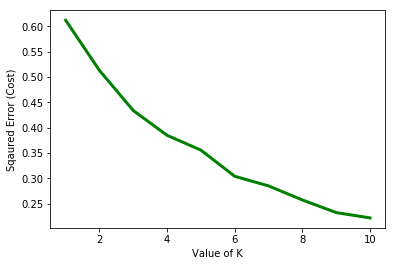

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt  
from matplotlib import style 
from sklearn.cluster import KMeans 
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(Borough_venues_sorted_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

This isnt very clear, which means our data is not very clustered, will see if can find an optimal K by using a Visualizer 

In [123]:
# import yellowbrick visualizer

!pip install yellowbrick

     |████████████████████████████████| 266kB 7.5MB/s eta 0:00:01


We can use the Visualizer to find the optimum K value

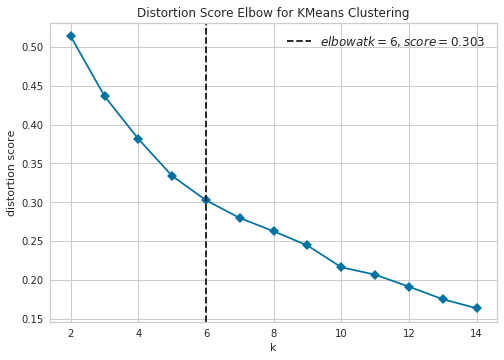

In [134]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,15), timings=False
)

visualizer.fit(Borough_venues_sorted_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()     

The visualizer suggest K = 6 may be the optimum

In [135]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 6

Borough_venues_sorted_grouped_clustering = venues_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Borough_venues_sorted_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 3, 5, 2, 5, 5, 1, 3, 2], dtype=int32)

# Add the clusters and the top 10 venues for each borough too the other information on London Boroughs

In [138]:
Borough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Borough_venues_sorted

london_merged = df_final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(Borough_venues_sorted.set_index('Borough'), on='Borough')

london_merged.head()

Borough   Area  Population  Latitude  Longitude  Total Crime  \
0  Barking and Dagenham  13.93    194352.0   51.5607     0.1557        20175   
1                Barnet  33.49    369088.0   51.6252    -0.1517        31571   
2                Bexley  23.38    236687.0   51.4549     0.1505        18059   
3                 Brent  16.70    317264.0   51.5588    -0.2817        30432   
4               Bromley  57.97    317899.0   51.4039     0.0198        25187   

   Average House Price  Crime per 1000 pop  Crime per sq mile  Cluster Labels  \
0             327136.0          103.806495        1448.312994               0   
1             532569.0           85.537866         942.699313               1   
2             331679.0           76.299079         772.412318               3   
3             446966.0           95.920117        1822.275449               5   
4             430033.0           79.229567         434.483353               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0         Grocery Store           Gas Station                  Park   
1            Restaurant           Coffee Shop         Grocery Store   
2            Restaurant                   Pub        Clothing Store   
3            Restaurant           Coffee Shop        Clothing Store   
4            Restaurant                   Pub        Clothing Store   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Supermarket  Gym / Fitness Center            Restaurant   
1                   Pub                  Park                  Café   
2           Coffee Shop           Supermarket         Grocery Store   
3                 Hotel        Sandwich Place                   Bar   
4           Pizza Place           Coffee Shop  Gym / Fitness Center   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0              Platform                  Pool           Coffee Shop   
1              Pharmacy                 Hotel           Supermarket   
2                 Hotel              Pharmacy           Rugby Pitch   
3         Grocery Store           Pizza Place   Sporting Goods Shop   
4                  Park        Sandwich Place             Gastropub   

  10th Most Common Venue  
0           Soccer Field  
1            Pizza Place  
2                 Garden  
3   Gym / Fitness Center  
4       Department Store

## Plot the clusters onto our Map of london to show both the crime rate and the clusters

In [139]:
## Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add choropleth
bins2 = list(df_final['Crime per 1000 pop'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=london_geo,
    data=df_final,
    columns=['Borough', 'Crime per 1000 pop'],
    key_on='properties.name',
    fill_color='PuBuGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Crime Rate per sq mile',
    bins=bins2,
    reset=True
    ).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## Check the characteristics of each of the clusters to find one that meets our requirements, e.g. resturants, pubs, parks 

In [140]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(9, london_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
0  Barking and Dagenham               0         Grocery Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Gas Station                  Park           Supermarket   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0  Gym / Fitness Center            Restaurant              Platform   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                  Pool           Coffee Shop           Soccer Field

In [141]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(9, london_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
1                   Barnet               1            Restaurant   
6                  Croydon               1            Restaurant   
13                  Harrow               1            Restaurant   
15              Hillingdon               1            Restaurant   
16                Hounslow               1            Restaurant   
18  Kensington and Chelsea               1            Restaurant   
22                  Merton               1            Restaurant   
24               Redbridge               1            Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1            Coffee Shop         Grocery Store                   Pub   
6                    Pub           Coffee Shop                 Hotel   
13           Coffee Shop         Grocery Store        Sandwich Place   
15           Coffee Shop                   Pub                   Gym   
16           Coffee Shop              Bus Stop        Clothing Store   
18                   Pub                   Bar                  Café   
22           Coffee Shop           Supermarket         Grocery Store   
24         Grocery Store           Supermarket           Coffee Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1                   Park                  Café              Pharmacy   
6         Clothing Store           Supermarket                  Park   
13                  Café           Supermarket                  Park   
15           Supermarket                 Hotel  Gym / Fitness Center   
16                 Hotel           Supermarket        Sandwich Place   
18                Bakery                Garden                  Park   
22                  Park                  Café        Clothing Store   
24        Clothing Store                  Park                Bakery   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
1                  Hotel           Supermarket            Pizza Place  
6                   Café         Grocery Store              Bookstore  
13                   Bar                   Pub                    Gym  
15          Burger Joint        Sandwich Place               Pharmacy  
16     Convenience Store        Discount Store               Pharmacy  
18           Supermarket        Science Museum           Burger Joint  
22                 Hotel           Pizza Place                    Bar  
24             Irish Pub      Department Store   Gym / Fitness Center

In [142]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(9, london_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
4          Bromley               2            Restaurant   
8          Enfield               2            Restaurant   
9        Greenwich               2            Restaurant   
10         Hackney               2            Restaurant   
12        Haringey               2            Restaurant   
14        Havering               2            Restaurant   
21        Lewisham               2           Coffee Shop   
27          Sutton               2            Restaurant   
29  Waltham Forest               2            Restaurant   
30      Wandsworth               2            Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4                    Pub        Clothing Store           Pizza Place   
8                    Pub           Coffee Shop           Supermarket   
9          Grocery Store                   Pub           Coffee Shop   
10                   Pub           Coffee Shop                Bakery   
12                   Pub                  Café                  Park   
14           Coffee Shop         Grocery Store                   Pub   
21            Restaurant                   Pub                  Café   
27                   Pub           Coffee Shop         Grocery Store   
29                   Pub                  Café         Grocery Store   
30                   Pub                  Park           Coffee Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
4            Coffee Shop  Gym / Fitness Center                  Park   
8            Pizza Place        Clothing Store         Grocery Store   
9                   Park                Bakery  Gym / Fitness Center   
10                  Café               Brewery                  Park   
12         Grocery Store                   Bar                Bakery   
14        Clothing Store                  Café         Shopping Mall   
21                   Bar                  Park           Supermarket   
27                  Café        Clothing Store           Supermarket   
29           Coffee Shop           Supermarket           Pizza Place   
30           Pizza Place                   Bar                  Café   

   8th Most Common Venue   9th Most Common Venue 10th Most Common Venue  
4         Sandwich Place               Gastropub       Department Store  
8               Pharmacy           Train Station   Gym / Fitness Center  
9                  Hotel          Sandwich Place                   Café  
10             Wine Shop               Bookstore            Pizza Place  
12           Coffee Shop       Food & Drink Shop            Pizza Place  
14           Supermarket  Furniture / Home Store              Multiplex  
21               Theater       Fish & Chips Shop            Pizza Place  
27                  Park             Pizza Place         Sandwich Place  
29  Gym / Fitness Center                   Hotel         Sandwich Place  
30           Supermarket            Burger Joint          Grocery Store

In [143]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(9, london_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
2                   Bexley               3            Restaurant   
7                   Ealing               3            Restaurant   
11  Hammersmith and Fulham               3            Restaurant   
17               Islington               3            Restaurant   
19    Kingston upon Thames               3            Restaurant   
20                 Lambeth               3            Restaurant   
25    Richmond upon Thames               3            Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
2                    Pub        Clothing Store           Coffee Shop   
7                    Pub                  Park           Coffee Shop   
11                   Pub                  Café           Coffee Shop   
17                   Pub                  Park                   Bar   
19                   Pub           Coffee Shop                  Café   
20                   Pub           Coffee Shop                   Bar   
25                   Pub                  Café                  Park   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
2            Supermarket         Grocery Store                 Hotel   
7                  Hotel           Pizza Place                  Café   
11                   Bar                  Park           Pizza Place   
17           Coffee Shop               Theater             Gastropub   
19          Burger Joint      Department Store                  Park   
20           Pizza Place                Market                  Park   
25           Coffee Shop         Rugby Stadium                Garden   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
2               Pharmacy           Rugby Pitch                 Garden  
7           Burger Joint        Sandwich Place   Gym / Fitness Center  
11             Gastropub                 Plaza                  Hotel  
17           Fish Market                Bakery            Pizza Place  
19             Gastropub             Bookstore                    Bar  
20               Brewery                  Café              BBQ Joint  
25                 Hotel         Historic Site              Gastropub

In [144]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(9, london_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
23       Newham               4                 Hotel            Restaurant   
31  Westminster               4                 Hotel            Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
23           Coffee Shop  Gym / Fitness Center                  Café   
31                 Plaza                  Café        Clothing Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
23                  Park         Grocery Store    Light Rail Station   
31                  Park              Boutique                   Bar   

   9th Most Common Venue 10th Most Common Venue  
23        Sandwich Place                    Bar  
31            Art Museum         Ice Cream Shop

In [145]:
london_merged.loc[london_merged['Cluster Labels'] == 5, london_merged.columns[[0] + list(range(9, london_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
3            Brent               5            Restaurant   
5           Camden               5            Restaurant   
26       Southwark               5            Restaurant   
28   Tower Hamlets               5            Restaurant   
32  City of London               5            Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3            Coffee Shop        Clothing Store                 Hotel   
5            Coffee Shop                   Bar                 Hotel   
26           Coffee Shop                   Bar                 Hotel   
28           Coffee Shop                   Bar                 Hotel   
32                   Bar           Coffee Shop                 Hotel   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3         Sandwich Place                   Bar         Grocery Store   
5              Bookstore        Breakfast Spot           Pizza Place   
26                   Pub                Bakery                Garden   
28          Burger Joint                  Park                   Pub   
32        Scenic Lookout  Gym / Fitness Center         Grocery Store   

   8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
3            Pizza Place    Sporting Goods Shop   Gym / Fitness Center  
5                 Bakery                  Plaza                  Canal  
26               Brewery  Street Food Gathering   Gym / Fitness Center  
28                 Plaza   Gym / Fitness Center                 Lounge  
32          Burger Joint  Street Food Gathering              Bike Shop

# Looking at the top 3 venues for each cluster, clusters 1,2,3,5 all have resturants as there top venue, clusters 2 and 3 have pubs as their second top venues, cluster 3 has parks in the thrid top venues. So it appears that cluster 3 is likely to meet our desired needs of resturants, pubs and parks

Lets look at cluster 3

In [146]:
# lets filter the data on cluster 0
df_compare = london_merged[london_merged['Cluster Labels'] == 3]

In [147]:
# Sort the data based on the crime rate
df_compare.sort_values(['Crime per 1000 pop'])

Borough   Area  Population  Latitude  Longitude  \
25    Richmond upon Thames  22.17    191365.0   51.4479    -0.3260   
2                   Bexley  23.38    236687.0   51.4549     0.1505   
19    Kingston upon Thames  14.38    166793.0   51.4085    -0.3064   
7                   Ealing  21.44    342494.0   51.5130    -0.3089   
20                 Lambeth  10.36    314242.0   51.4607    -0.1163   
11  Hammersmith and Fulham   6.33    178685.0   51.4927    -0.2339   
17               Islington   5.74    215667.0   51.5416    -0.1022   

    Total Crime  Average House Price  Crime per 1000 pop  Crime per sq mile  \
25        12932             633481.0           67.577666         583.310780   
2         18059             331679.0           76.299079         772.412318   
19        13216             506000.0           79.235939         919.054242   
7         31820             454027.0           92.906737        1484.141791   
20        36231             525487.0          115.296491        3497.200772   
11        23886             747174.0          133.676582        3773.459716   
17        30359             632270.0          140.767943        5289.024390   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
25               3            Restaurant                   Pub   
2                3            Restaurant                   Pub   
19               3            Restaurant                   Pub   
7                3            Restaurant                   Pub   
20               3            Restaurant                   Pub   
11               3            Restaurant                   Pub   
17               3            Restaurant                   Pub   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
25                  Café                  Park           Coffee Shop   
2         Clothing Store           Coffee Shop           Supermarket   
19           Coffee Shop                  Café          Burger Joint   
7                   Park           Coffee Shop                 Hotel   
20           Coffee Shop                   Bar           Pizza Place   
11                  Café           Coffee Shop                   Bar   
17                  Park                   Bar           Coffee Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
25         Rugby Stadium                Garden                 Hotel   
2          Grocery Store                 Hotel              Pharmacy   
19      Department Store                  Park             Gastropub   
7            Pizza Place                  Café          Burger Joint   
20                Market                  Park               Brewery   
11                  Park           Pizza Place             Gastropub   
17               Theater             Gastropub           Fish Market   

   9th Most Common Venue 10th Most Common Venue  
25         Historic Site              Gastropub  
2            Rugby Pitch                 Garden  
19             Bookstore                    Bar  
7         Sandwich Place   Gym / Fitness Center  
20                  Café              BBQ Joint  
11                 Plaza                  Hotel  
17                Bakery            Pizza Place

Lets just filter on the columns to help us decide on a Borough to move too, Average house price and crime per 1000 population

In [148]:
# Select the columns

df_wheretolive = df_compare[['Borough','Average House Price', 'Crime per 1000 pop']]

Tidy up the table for display, sort by Crime per 1000 pop, format the numbers for currency and rounding, and rest the index

In [162]:
df_wheretolive.sort_values(['Crime per 1000 pop']).reset_index(drop=True).style.format({'Average House Price': "£{:20,.0f}", 
                          'Crime per 1000 pop': "{:20,.0f}"})